In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import numpy as np

obama = pd.read_csv("obama.csv")
house = pd.read_csv("whiteHouse.csv")
#obama.reset_index(inplace=True,drop=True)
#house.reset_index(inplace=True,drop=True)

data = pd.concat([house, obama],ignore_index=True)
data['created_at'] = pd.to_datetime(data.timestamp, format="%Y-%m-%d %H:%M:%S")
data.sort_values(by=['created_at'], inplace=True, ascending=True)
#drop uselesess stuff
data = data[pd.isnull(data['in_reply_to_user_id'])]
data = data[pd.isnull(data["retweeted_status_id"])]
data.drop(["retweeted_status_id","in_reply_to_user_id","expanded_urls","timestamp","in_reply_to_status_id","retweeted_status_user_id","retweeted_status_timestamp"],axis=1,inplace=True)

data.reset_index(inplace=True,drop=True)

data["year"] = [d.year for d in data["created_at"]]
data["week_year"] = [d.weekofyear for d in data["created_at"]]

print(data.columns)
data.drop(["created_at","tweet_id","source"],inplace=True,axis=1)
#lowercase everything
data['modded_text'] = data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

data

Index(['tweet_id', 'source', 'text', 'created_at', 'year', 'week_year'], dtype='object')


,text,year,week_year,modded_text
0,RT @CDC_eHealth: New CDC widget - Tips for pre...,2009,18,rt @cdc_ehealth: new cdc widget - tips for pre...
1,RT @DHSJournal: Press Briefing VIDEO: Homeland...,2009,18,rt @dhsjournal: press briefing video: homeland...
2,RT @CDC_eHealth Add a graphic with flu prevent...,2009,18,rt @cdc_ehealth add a graphic with flu prevent...
3,The President's Remarks on Justice Souter: The...,2009,18,the president's remarks on justice souter: the...
4,WhiteHouse 2.0: Today the White House is takin...,2009,18,whitehouse 2.0: today the white house is takin...
5,Shooting Around With the Huskies: The Presiden...,2009,18,shooting around with the huskies: the presiden...
6,RT @CDC_eHealth Check out CDC's new webpage hi...,2009,18,rt @cdc_ehealth check out cdc's new webpage hi...
7,Check out the CDC website (www.cdc.gov) or @CD...,2009,18,check out the cdc website (www.cdc.gov) or @cd...
8,Welcome to the official Twitter page for the W...,2009,18,welcome to the official twitter page for the w...
9,“My Fellow Americans”: The President attends a...,2009,18,“my fellow americans”: the president attends a...


In [2]:
data["year"].unique().tolist()

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [5]:
data.drop_duplicates(subset=["text"],inplace=True)
data.reset_index(inplace=True,drop=True)
data

,text,year,week_year,modded_text
0,RT @CDC_eHealth: New CDC widget - Tips for pre...,2009,18,rt @cdc_ehealth: new cdc widget - tips for pre...
1,RT @DHSJournal: Press Briefing VIDEO: Homeland...,2009,18,rt @dhsjournal: press briefing video: homeland...
2,RT @CDC_eHealth Add a graphic with flu prevent...,2009,18,rt @cdc_ehealth add a graphic with flu prevent...
3,The President's Remarks on Justice Souter: The...,2009,18,the president's remarks on justice souter: the...
4,WhiteHouse 2.0: Today the White House is takin...,2009,18,whitehouse 2.0: today the white house is takin...
5,Shooting Around With the Huskies: The Presiden...,2009,18,shooting around with the huskies: the presiden...
6,RT @CDC_eHealth Check out CDC's new webpage hi...,2009,18,rt @cdc_ehealth check out cdc's new webpage hi...
7,Check out the CDC website (www.cdc.gov) or @CD...,2009,18,check out the cdc website (www.cdc.gov) or @cd...
8,Welcome to the official Twitter page for the W...,2009,18,welcome to the official twitter page for the w...
9,“My Fellow Americans”: The President attends a...,2009,18,“my fellow americans”: the president attends a...


In [6]:
tags = {}
for idx,row in data.iterrows():
    l = re.findall(r'(?<!\w)(@\w{1,15})\b',row["modded_text"])
    for tag in l:
        if tag in tags:
            tags[tag] = tags[tag] + 1
        else:
            tags[tag] = 1
print("total unique",len(tags))

common = []
uncommon = []
for el in tags:
    if tags[el] >= 10:
        common.append(el)
    if tags[el] < 10:
        uncommon.append(el)
print("unique uncommon", len(uncommon))
print("unique common",len(common))

t = []
for idx,row in data.iterrows():
    l = re.findall(r'(?<!\w)(@\w{1,15})\b',row["modded_text"])
    g = row["modded_text"]
    for el in row["modded_text"].split():
        if el in uncommon:
            g = row["modded_text"].replace(el," ")
    t.append(g)
data["modded1"] = t

total unique 1299
unique uncommon 1230
unique common 69


In [7]:
tags1 = {}
for idx,row in data.iterrows():
    l = re.findall(r'(?<!\w)(@\w{1,15})\b',row["modded1"])
    for tag in l:
        if tag in tags1:
            tags1[tag] = tags1[tag] + 1
        else:
            tags1[tag] = 1
print(len(tags1))

903


In [8]:
data

,text,year,week_year,modded_text,modded1
0,RT @CDC_eHealth: New CDC widget - Tips for pre...,2009,18,rt @cdc_ehealth: new cdc widget - tips for pre...,rt @cdc_ehealth: new cdc widget - tips for pre...
1,RT @DHSJournal: Press Briefing VIDEO: Homeland...,2009,18,rt @dhsjournal: press briefing video: homeland...,rt @dhsjournal: press briefing video: homeland...
2,RT @CDC_eHealth Add a graphic with flu prevent...,2009,18,rt @cdc_ehealth add a graphic with flu prevent...,rt add a graphic with flu prevention message...
3,The President's Remarks on Justice Souter: The...,2009,18,the president's remarks on justice souter: the...,the president's remarks on justice souter: the...
4,WhiteHouse 2.0: Today the White House is takin...,2009,18,whitehouse 2.0: today the white house is takin...,whitehouse 2.0: today the white house is takin...
5,Shooting Around With the Huskies: The Presiden...,2009,18,shooting around with the huskies: the presiden...,shooting around with the huskies: the presiden...
6,RT @CDC_eHealth Check out CDC's new webpage hi...,2009,18,rt @cdc_ehealth check out cdc's new webpage hi...,rt check out cdc's new webpage highlighting ...
7,Check out the CDC website (www.cdc.gov) or @CD...,2009,18,check out the cdc website (www.cdc.gov) or @cd...,check out the cdc website (www.cdc.gov) or t...
8,Welcome to the official Twitter page for the W...,2009,18,welcome to the official twitter page for the w...,welcome to the official twitter page for the w...
9,“My Fellow Americans”: The President attends a...,2009,18,“my fellow americans”: the president attends a...,“my fellow americans”: the president attends a...


In [9]:
#check hashtags
hashtags = {}
for idx,row in data.iterrows():
    l = re.findall("#\S+",row["modded1"])
    for tag in l:
        if tag in hashtags:
            hashtags[tag] = hashtags[tag] + 1
        else:
            hashtags[tag] = 1
print("total unique",len(hashtags))

comHashtags = []
uncomHashtags = []
for el in hashtags:
    if hashtags[el] >= 10:
        comHashtags.append(el)
    if hashtags[el] < 10:
        uncomHashtags.append(el)
print("unique uncommon", len(uncomHashtags))
print("unique common",len(comHashtags))


t = []
for idx,row in data.iterrows():
    l = re.findall("#\S+",row["modded1"])
    g = row["modded1"]
    for el in row["modded1"].split():
        if el in uncomHashtags:
            g = row["modded1"].replace(el," ")
    t.append(g)
data["modded1"] = t

total unique 2119
unique uncommon 1913
unique common 206


In [10]:
#check correctly removed stuff
hashtags1 = {}
for idx,row in data.iterrows():
    l = re.findall("#\S+",row["modded1"])
    for tag in l:
        if tag in hashtags1:
            hashtags1[tag] = hashtags1[tag] + 1
        else:
            hashtags1[tag] = 1
print(len(hashtags1))

480


In [11]:
#esistono caratteri asiatici, rimuovo
data['modded1'] = data["modded1"].str.replace("[^\x00-\x7F]",' ')

In [12]:
#remove &amp, special html character for &
data['modded1'] = data["modded1"].str.replace("&amp",' ')

#remove punctuation
data['modded1'] = data["modded1"].str.replace("[^\w\s]",'')
#rimosso &amp correttamente
for idx,row in data.iterrows():
    l = re.findall("&amp",row["modded1"])
    if len(l) != 0:
        print(row["modded1"])

#rimuovi links
data["modded1"] = data["modded1"].str.replace("http\S+"," ")

data["noTags_punct"] = data["modded1"]


In [13]:
data

,text,year,week_year,modded_text,modded1,noTags_punct
0,RT @CDC_eHealth: New CDC widget - Tips for pre...,2009,18,rt @cdc_ehealth: new cdc widget - tips for pre...,rt cdc_ehealth new cdc widget tips for preven...,rt cdc_ehealth new cdc widget tips for preven...
1,RT @DHSJournal: Press Briefing VIDEO: Homeland...,2009,18,rt @dhsjournal: press briefing video: homeland...,rt dhsjournal press briefing video homeland se...,rt dhsjournal press briefing video homeland se...
2,RT @CDC_eHealth Add a graphic with flu prevent...,2009,18,rt @cdc_ehealth add a graphic with flu prevent...,rt add a graphic with flu prevention message...,rt add a graphic with flu prevention message...
3,The President's Remarks on Justice Souter: The...,2009,18,the president's remarks on justice souter: the...,the presidents remarks on justice souter the p...,the presidents remarks on justice souter the p...
4,WhiteHouse 2.0: Today the White House is takin...,2009,18,whitehouse 2.0: today the white house is takin...,whitehouse 20 today the white house is taking ...,whitehouse 20 today the white house is taking ...
5,Shooting Around With the Huskies: The Presiden...,2009,18,shooting around with the huskies: the presiden...,shooting around with the huskies the president...,shooting around with the huskies the president...
6,RT @CDC_eHealth Check out CDC's new webpage hi...,2009,18,rt @cdc_ehealth check out cdc's new webpage hi...,rt check out cdcs new webpage highlighting s...,rt check out cdcs new webpage highlighting s...
7,Check out the CDC website (www.cdc.gov) or @CD...,2009,18,check out the cdc website (www.cdc.gov) or @cd...,check out the cdc website wwwcdcgov or to le...,check out the cdc website wwwcdcgov or to le...
8,Welcome to the official Twitter page for the W...,2009,18,welcome to the official twitter page for the w...,welcome to the official twitter page for the w...,welcome to the official twitter page for the w...
9,“My Fellow Americans”: The President attends a...,2009,18,“my fellow americans”: the president attends a...,my fellow americans the president attends a ...,my fellow americans the president attends a ...


In [14]:
#remove stopwords
import nltk
from nltk.corpus import stopwords

stop = stopwords.words('english')

data['modded1'] = data['modded1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#there are empty rows
#data = data[data["modded1"] != ""]
data["modded1"]


0        rt cdc_ehealth new cdc widget tips preventing ...
1        rt dhsjournal press briefing video homeland se...
2        rt add graphic flu prevention messages webpage...
3        presidents remarks justice souter president ma...
4        whitehouse 20 today white house taking steps e...
5        shooting around huskies president shot hoops u...
6        rt check cdcs new webpage highlighting several...
7        check cdc website wwwcdcgov learn h1n1 flu swi...
8                welcome official twitter page white house
9        fellow americans president attends naturalizat...
10       weekly address government actions address h1n1...
11       official info h1n1 cdcemergency cdc_ehealth wh...
12       ethics update done spirit transparency norm ei...
13       rt cdcemergency h1n1 flu swine flu swineflu go...
14       good jobs home president offers proposals curb...
15       rt cdc_ehealth cdc joined facebook become fan ...
16                      heres better link live stream li

In [15]:
#stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stemmedTweets = []

for idx, row in data.iterrows():
    test = row["modded1"].split()
    desc = ""
    for el in test:
        desc = desc + " " + stemmer.stem(el) + " "
    stemmedTweets.append(desc)
temp = pd.Series(stemmedTweets)
print(len(data),len(temp))
data["modded1_stemmed"] = temp

data

18476 18476


,text,year,week_year,modded_text,modded1,noTags_punct,modded1_stemmed
0,RT @CDC_eHealth: New CDC widget - Tips for pre...,2009,18,rt @cdc_ehealth: new cdc widget - tips for pre...,rt cdc_ehealth new cdc widget tips preventing ...,rt cdc_ehealth new cdc widget tips for preven...,rt cdc_ehealth new cdc widget tip preve...
1,RT @DHSJournal: Press Briefing VIDEO: Homeland...,2009,18,rt @dhsjournal: press briefing video: homeland...,rt dhsjournal press briefing video homeland se...,rt dhsjournal press briefing video homeland se...,rt dhsjournal press brief video homeland...
2,RT @CDC_eHealth Add a graphic with flu prevent...,2009,18,rt @cdc_ehealth add a graphic with flu prevent...,rt add graphic flu prevention messages webpage...,rt add a graphic with flu prevention message...,rt add graphic flu prevent messag webpa...
3,The President's Remarks on Justice Souter: The...,2009,18,the president's remarks on justice souter: the...,presidents remarks justice souter president ma...,the presidents remarks on justice souter the p...,presid remark justic souter presid made ...
4,WhiteHouse 2.0: Today the White House is takin...,2009,18,whitehouse 2.0: today the white house is takin...,whitehouse 20 today white house taking steps e...,whitehouse 20 today the white house is taking ...,whitehous 20 today white hous take step...
5,Shooting Around With the Huskies: The Presiden...,2009,18,shooting around with the huskies: the presiden...,shooting around huskies president shot hoops u...,shooting around with the huskies the president...,shoot around huski presid shot hoop und...
6,RT @CDC_eHealth Check out CDC's new webpage hi...,2009,18,rt @cdc_ehealth check out cdc's new webpage hi...,rt check cdcs new webpage highlighting several...,rt check out cdcs new webpage highlighting s...,rt check cdc new webpag highlight sever...
7,Check out the CDC website (www.cdc.gov) or @CD...,2009,18,check out the cdc website (www.cdc.gov) or @cd...,check cdc website wwwcdcgov learn h1n1 flu swi...,check out the cdc website wwwcdcgov or to le...,check cdc websit wwwcdcgov learn h1n1 f...
8,Welcome to the official Twitter page for the W...,2009,18,welcome to the official twitter page for the w...,welcome official twitter page white house,welcome to the official twitter page for the w...,welcom offici twitter page white hous
9,“My Fellow Americans”: The President attends a...,2009,18,“my fellow americans”: the president attends a...,fellow americans president attends naturalizat...,my fellow americans the president attends a ...,fellow american presid attend natur cere...


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18476 entries, 0 to 18475
Data columns (total 7 columns):
text               18476 non-null object
year               18476 non-null int64
week_year          18476 non-null int64
modded_text        18476 non-null object
modded1            18476 non-null object
noTags_punct       18476 non-null object
modded1_stemmed    18476 non-null object
dtypes: int64(2), object(5)
memory usage: 1010.5+ KB


In [17]:
data.dropna(subset=['modded1_stemmed'],inplace=True)

11123


<function matplotlib.pyplot.show(*args, **kw)>

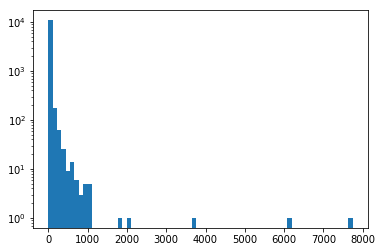

In [18]:
stemmed_words = pd.Series(' '.join(data['modded1_stemmed']).split()).value_counts()
print(len(stemmed_words))
plt.hist(stemmed_words.values,bins=70,log=True)
plt.show

In [19]:
stemmed_words

obama             7741
presid            6158
potu              3676
watch             2082
american          1793
live              1100
today             1100
us                1099
america           1005
year              1001
job                983
make               950
new                928
peopl              909
work               900
help               858
time               806
health             801
speak              769
million            750
nation             740
day                731
hous               726
get                709
famili             650
act                649
happen             648
rt                 644
need               630
white              611
                  ... 
sb50                 1
benefitsand          1
aug                  1
grandfath            1
spectat              1
43rd                 1
tonyabbottmhr        1
cnnmoney             1
21stcenturi          1
africathat           1
30k                  1
tolu                 1
pigford    

3928


<function matplotlib.pyplot.show(*args, **kw)>

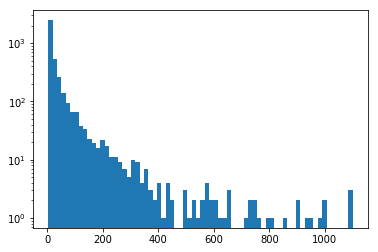

In [21]:
stemmed_words = stemmed_words[stemmed_words > 3]
stemmed_words = stemmed_words[stemmed_words < 1500]
print(len(stemmed_words))
plt.hist(stemmed_words.values,bins=70,log=True)
plt.show

In [ ]:
# data.drop(data.index[18502],inplace=True)

In [22]:
c = 0
l = 0
for idx,row in data.iterrows():
    l = l + len(row["text"].split())
    c = c + len(row["modded1_stemmed"].split())
print("original text",l)
print("modded and stemmed",c)

original text 330984
modded and stemmed 189712


In [23]:
data = data[data["modded1_stemmed"] != ""] 
data["modded1_stemmed"]

0         rt  cdc_ehealth  new  cdc  widget  tip  preve...
1         rt  dhsjournal  press  brief  video  homeland...
2         rt  add  graphic  flu  prevent  messag  webpa...
3         presid  remark  justic  souter  presid  made ...
4         whitehous  20  today  white  hous  take  step...
5         shoot  around  huski  presid  shot  hoop  und...
6         rt  check  cdc  new  webpag  highlight  sever...
7         check  cdc  websit  wwwcdcgov  learn  h1n1  f...
8              welcom  offici  twitter  page  white  hous 
9         fellow  american  presid  attend  natur  cere...
10        weekli  address  govern  action  address  h1n...
11        offici  info  h1n1  cdcemerg  cdc_ehealth  wh...
12        ethic  updat  done  spirit  transpar  norm  e...
13        rt  cdcemerg  h1n1  flu  swine  flu  swineflu...
14        good  job  home  presid  offer  propos  curb ...
15        rt  cdc_ehealth  cdc  join  facebook  becom  ...
16                 here  better  link  live  stream  liv

In [24]:
data.reset_index(inplace=True,drop=True)
data

,text,year,week_year,modded_text,modded1,noTags_punct,modded1_stemmed
0,RT @CDC_eHealth: New CDC widget - Tips for pre...,2009,18,rt @cdc_ehealth: new cdc widget - tips for pre...,rt cdc_ehealth new cdc widget tips preventing ...,rt cdc_ehealth new cdc widget tips for preven...,rt cdc_ehealth new cdc widget tip preve...
1,RT @DHSJournal: Press Briefing VIDEO: Homeland...,2009,18,rt @dhsjournal: press briefing video: homeland...,rt dhsjournal press briefing video homeland se...,rt dhsjournal press briefing video homeland se...,rt dhsjournal press brief video homeland...
2,RT @CDC_eHealth Add a graphic with flu prevent...,2009,18,rt @cdc_ehealth add a graphic with flu prevent...,rt add graphic flu prevention messages webpage...,rt add a graphic with flu prevention message...,rt add graphic flu prevent messag webpa...
3,The President's Remarks on Justice Souter: The...,2009,18,the president's remarks on justice souter: the...,presidents remarks justice souter president ma...,the presidents remarks on justice souter the p...,presid remark justic souter presid made ...
4,WhiteHouse 2.0: Today the White House is takin...,2009,18,whitehouse 2.0: today the white house is takin...,whitehouse 20 today white house taking steps e...,whitehouse 20 today the white house is taking ...,whitehous 20 today white hous take step...
5,Shooting Around With the Huskies: The Presiden...,2009,18,shooting around with the huskies: the presiden...,shooting around huskies president shot hoops u...,shooting around with the huskies the president...,shoot around huski presid shot hoop und...
6,RT @CDC_eHealth Check out CDC's new webpage hi...,2009,18,rt @cdc_ehealth check out cdc's new webpage hi...,rt check cdcs new webpage highlighting several...,rt check out cdcs new webpage highlighting s...,rt check cdc new webpag highlight sever...
7,Check out the CDC website (www.cdc.gov) or @CD...,2009,18,check out the cdc website (www.cdc.gov) or @cd...,check cdc website wwwcdcgov learn h1n1 flu swi...,check out the cdc website wwwcdcgov or to le...,check cdc websit wwwcdcgov learn h1n1 f...
8,Welcome to the official Twitter page for the W...,2009,18,welcome to the official twitter page for the w...,welcome official twitter page white house,welcome to the official twitter page for the w...,welcom offici twitter page white hous
9,“My Fellow Americans”: The President attends a...,2009,18,“my fellow americans”: the president attends a...,fellow americans president attends naturalizat...,my fellow americans the president attends a ...,fellow american presid attend natur cere...


In [25]:
data.to_csv("obamaprocessed.csv")